# A/B Test Results Analysis

# Мета:
# Провести детальний аналіз результатів A/B-тесту, включаючи перевірку гіпотез, обчислення довірчих інтервалів та візуалізацію даних.

# План:
# 1. Налаштування середовища
# 2. Завантаження даних
# 3. Попередній аналіз даних
# 4. Аналіз розподілу користувачів по групах
# 5. Аналіз ключових показників A/B-тесту
# 6. Перевірка гіпотез
# 7. Порівняння середніх з 95% довірчими інтервалами
# 8. Порівняння середніх з довірчими інтервалами Вілсона
# 9. Різниця конверсій B − A з 95% довірчим інтервалом (Newcombe/Wilson)
# 10. Графіки та візуалізації


# 1. Налаштування середовища
# Налаштування середовища шляхом імпорту необхідних бібліотек та конфігурації стилів графіків.


# Імпорт бібліотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
import matplotlib.patheffects as pe
import numpy as np

# 2. Завантаження даних
# Завантаження даних з CSV-файлу та попередній огляд структури даних.

In [ ]:
data = pd.read_csv(r"C:\Users\User\OneDrive\Рабочий стол\Data Analyst\_ab_test_data.csv")
data.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


# 3. Попередній аналіз даних
# Перевірка типів даних, наявності пропущених значень та перетворення стовпця з датою.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data.dtypes

user_id               object
timestamp     datetime64[ns]
test_group            object
conversion             int64
dtype: object

# Перегляд перших кількох рядків даних

In [ ]:
data.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


# Перевірка на пропущені значення

In [ ]:
data.isnull().sum()

user_id       0
timestamp     0
test_group    0
conversion    0
dtype: int64

# 4. Аналіз розподілу користувачів по групах
# Аналіз розподілу користувачів по групах A та B, включаючи кількість користувачів, відсоток у кожній групі та візуалізацію.

In [ ]:
data.groupby('test_group').describe()

timestamp                                 \
               count                           mean   
test_group                                            
a              10013  2023-07-14 02:34:29.519821312   
b               9985  2023-07-13 21:37:07.888925952   

                                                                       \
                                   min                            25%   
test_group                                                              
a           2023-07-03 01:46:14.688840  2023-07-08 13:48:52.874817024   
b           2023-07-03 01:42:34.033708  2023-07-08 08:08:48.495631104   

                                                                          \
                                      50%                            75%   
test_group                                                                 
a           2023-07-14 03:49:36.002731008  2023-07-19 14:06:28.688054016   
b           2023-07-13 19:14:14.073116928  2023-07-19 09:59:58.771382016   

                                            conversion                      \
                                   max  std      count      mean  min  25%   
test_group                                                                   
a           2023-07-25 01:41:19.152664  NaN    10013.0  0.061021  0.0  0.0   
b           2023-07-25 01:35:59.130658  NaN     9985.0  0.089034  0.0  0.0   

                                     
            50%  75%  max       std  
test_group                           
a           0.0  0.0  1.0  0.239380  
b           0.0  0.0  1.0  0.284806

# Кількість унікальних користувачів в кожній групі

In [ ]:
data.groupby('test_group')['user_id'].nunique()

test_group
a    10013
b     9985
Name: user_id, dtype: int64

# Відсоток користувачів в кожній групі

In [ ]:
group_count = data['test_group'].value_counts()
group_percent = ( group_count / group_count.sum() ) * 100

In [ ]:
df_group = pd.DataFrame({
    'variant': group_count.index,
    'users': group_count.values,
    'percent': group_percent.values
})

In [ ]:
df_group

,variant,users,percent
0,a,10013,50.070007
1,b,9985,49.929993


# Візуалізація розподілу користувачів по групах

Text(0, 0.5, 'Users Count')

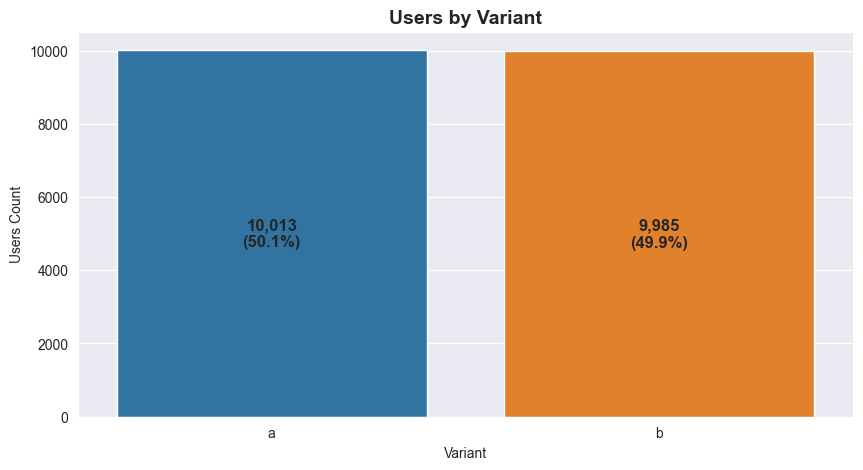

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_group, x='variant', y='users', hue='variant', legend=False)

for i, row in df_group.iterrows():
    ax.text(i,
            row['users'] / 2,
            f"{row['users']:,}\n({row['percent']:.1f}%)",
            ha='center', va='center', fontsize=12, weight='bold'
           )

plt.title("Users by Variant", fontsize=14, weight='bold')
plt.xlabel("Variant")
plt.ylabel("Users Count")


In [ ]:
data.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


# 5. Аналіз ключових показників A/B-тесту
# Аналіз ключових показників A/B-тесту, включаючи кількість користувачів по днях, кількість конверсій, рівень конверсії, перевірку гіпотез та довірчі інтервали.

In [ ]:
data['date'] = data['timestamp'].dt.date

In [ ]:
data.head()

,user_id,timestamp,test_group,conversion,date
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0,2023-07-04
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0,2023-07-06
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0,2023-07-10
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0,2023-07-20
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0,2023-07-19


# Кількість користувачів по днях в групах A та B відповідно

# Daily Users by Variant

In [ ]:
daily_counts = (
    data.groupby(['date', 'test_group'])['user_id']
    .nunique()
    .reset_index(name='users')
)

daily_counts.head()

,date,test_group,users
0,2023-07-03,a,412
1,2023-07-03,b,445
2,2023-07-04,a,446
3,2023-07-04,b,452
4,2023-07-05,a,436


# Візуалізація кількості користувачів по днях в групах A та B відповідно

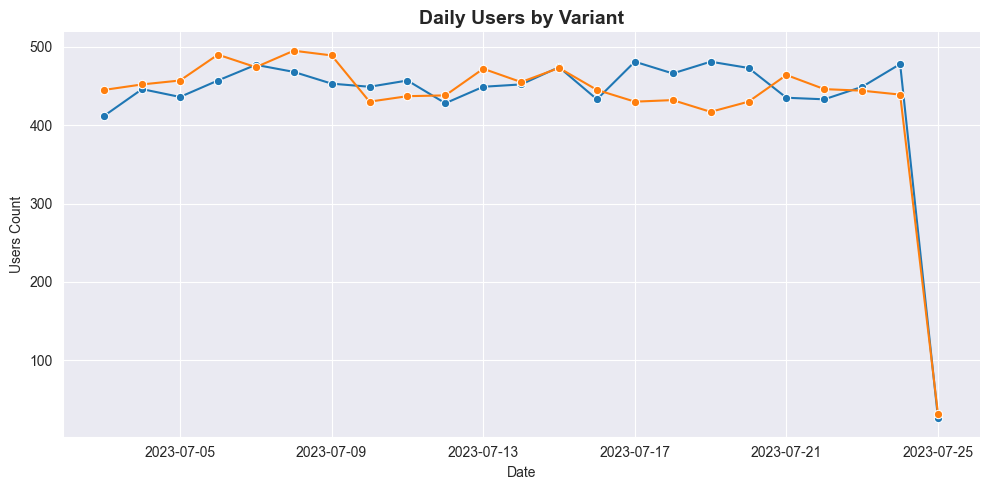

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_counts, x='date', y='users', hue='test_group', marker='o', legend=False )

plt.title("Daily Users by Variant", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Users Count")
sns.despine()
plt.tight_layout()
plt.show()


# Кількість конверсій у групах A та B відповідно

In [ ]:
conversions_count = (
    data[data['conversion'] == 1]
    .groupby('test_group')['user_id']
    .nunique()
    .reset_index(name='conversions')
)

conversions_count


,test_group,conversions
0,a,611
1,b,889


# Графік динаміки рівня конверсії по днях для груп A та B

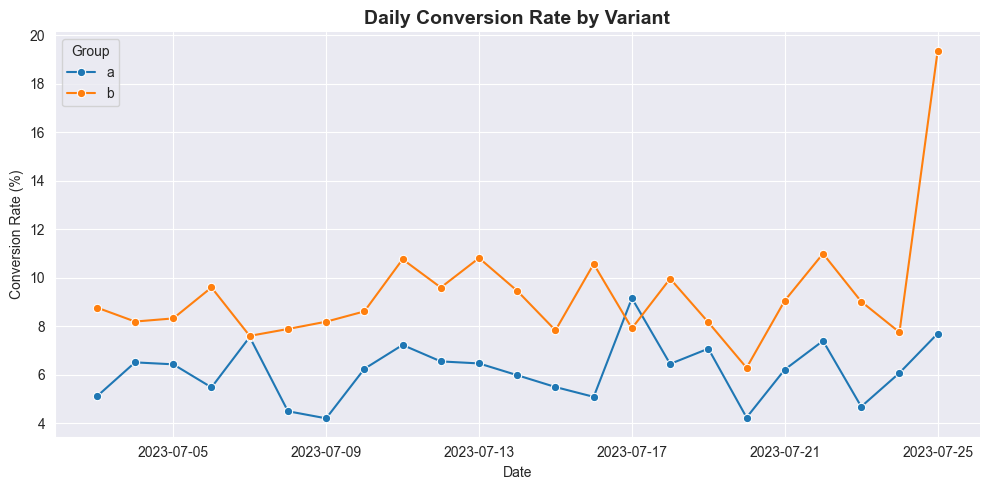

In [ ]:
daily_cr = (
    data.groupby(['date', 'test_group'])
        .agg(users=('user_id', 'nunique'),
             conversions=('conversion', 'sum'))
        .assign(conversion_rate=lambda d: d['conversions'] / d['users'] * 100)
        .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_cr, x='date', y='conversion_rate', hue='test_group', marker='o')
plt.title("Daily Conversion Rate by Variant", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Conversion Rate (%)")
plt.legend(title="Group")
sns.despine()
plt.tight_layout()
plt.show()


# Візуалізація кількості конверсій у групах A та B відповідно

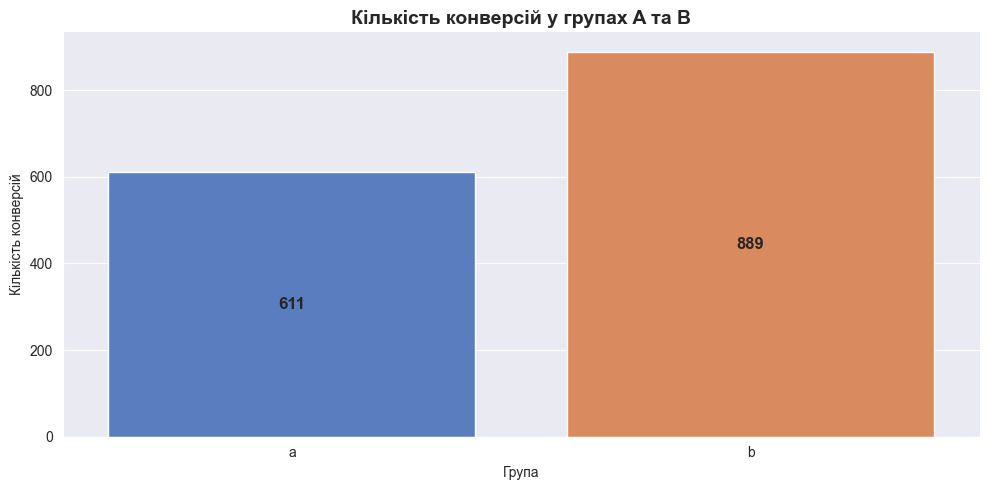

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=conversions_count,
    x='test_group',
    y='conversions',
    hue='test_group',
    legend=False,
    palette='muted'
)

for i, row in conversions_count.iterrows():
    ax.text(
        i,
        row['conversions'] / 2,
        f"{int(row['conversions']):,}",
        ha='center', va='center',
        fontsize=12, weight='bold'
    )

plt.title("Кількість конверсій у групах A та B", fontsize=14, weight='bold')
plt.xlabel("Група")
plt.ylabel("Кількість конверсій")
sns.despine()
plt.tight_layout()
plt.show()


# Загальна тривалість тесту в днях

In [ ]:
start_date = data['timestamp'].min().date()
end_date = data['timestamp'].max().date()

duration_days = (end_date - start_date).days + 1

print(start_date)
print(end_date)
print(duration_days)

2023-07-03
2023-07-25
23


In [ ]:
data.head()

,user_id,timestamp,test_group,conversion,date
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0,2023-07-04
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0,2023-07-06
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0,2023-07-10
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0,2023-07-20
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0,2023-07-19


In [ ]:
data[['user_id', 'test_group', 'conversion']].groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

# Рівень конверсії в групах A та B відповідно

In [ ]:
conversion_rate = (
    data.groupby('test_group')['conversion']
    .mean() * 100
)

conversion_rate = conversion_rate.reset_index().rename(columns={'conversion': 'conversion_rate'})
conversion_rate


,test_group,conversion_rate
0,a,6.102067
1,b,8.903355


# Візуалізація рівня конверсії в групах A та B відповідно

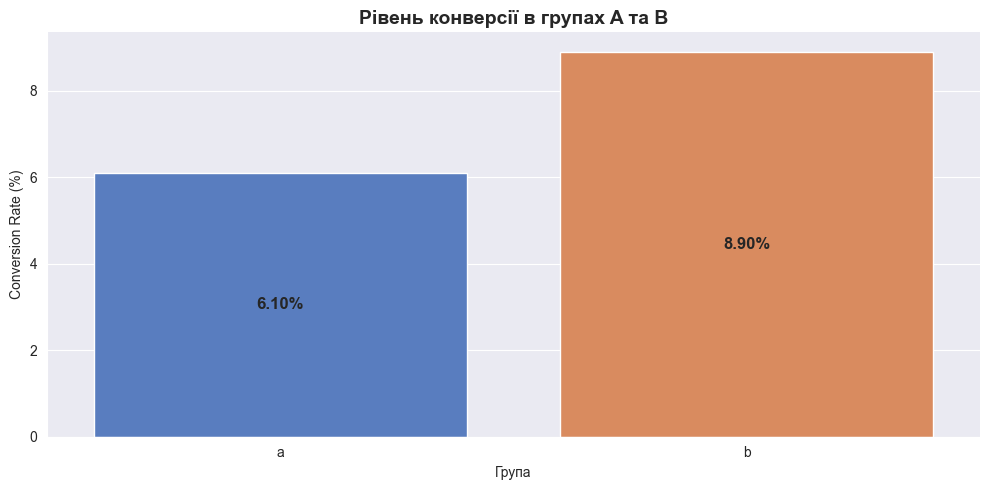

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=conversion_rate,
    x='test_group',
    y='conversion_rate',
    hue='test_group',
    legend=False,
    palette='muted'
)

for i, row in conversion_rate.iterrows():
    ax.text(
        i,
        row['conversion_rate'] / 2,
        f"{row['conversion_rate']:.2f}%",
        ha='center', va='center',
        fontsize=12, weight='bold'
    )

plt.title("Рівень конверсії в групах A та B", fontsize=14, weight='bold')
plt.xlabel("Група")
plt.ylabel("Conversion Rate (%)")
sns.despine()
plt.tight_layout()
plt.show()


# Конверсії по групах A та B відповідно


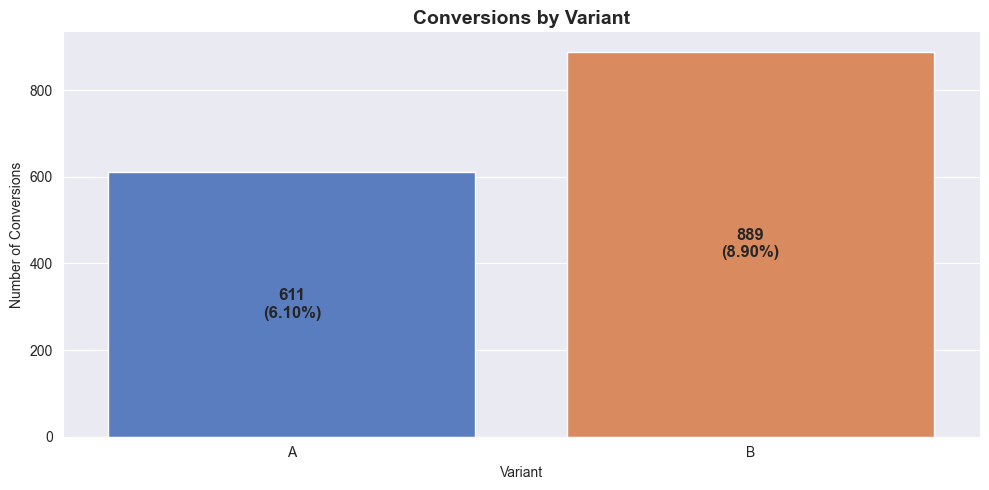

In [ ]:
# Данные
df_conv = pd.DataFrame({
    'variant': ['A', 'B'],
    'users': [10013, 9985],
    'conversions': [611, 889]
})
df_conv['percent'] = df_conv['conversions'] / df_conv['users'] * 100

# График
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=df_conv,
    x='variant',
    y='conversions',
    hue='variant',
    legend=False,
    palette='muted'
)

# Подписи — точно как в оригинале
for i, row in df_conv.iterrows():
    ax.text(
        i,
        row['conversions'] / 2,
        f"{int(row['conversions']):,}\n({row['percent']:.2f}%)",
        ha='center', va='center',
        fontsize=12, weight='bold'
    )

# Оформление
plt.title("Conversions by Variant", fontsize=14, weight='bold')
plt.xlabel("Variant")
plt.ylabel("Number of Conversions")
sns.despine()
plt.tight_layout()
plt.show()

# 6. Перевірка гіпотез
# Перевірка гіпотез для визначення статистичної значущості різниці між групами A та B.

Ho: Різниці між середніми двох груп немає \
H1: Різниця між групи є

# Z-тест пропорцій для порівняння конверсій у групах A та B


In [ ]:
data['test_group'] = data['test_group'].str.lower()
per_user = data.groupby(['user_id', 'test_group'], as_index=False)['conversion'].max()

conv_A = per_user.loc[per_user['test_group'] == 'a', 'conversion']
conv_B = per_user.loc[per_user['test_group'] == 'b', 'conversion']

n1, n2 = len(conv_A), len(conv_B)
x1, x2 = int(conv_A.sum()), int(conv_B.sum())

if n1 == 0 or n2 == 0:
    raise ValueError(f"Порожня вибірка: nA={n1}, nB={n2}. Перевірь фільтри й значення у 'test_group'.")

p1, p2 = x1/n1, x2/n2
p_pool = (x1 + x2) / (n1 + n2)
se = math.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

if se == 0:
    z = 0.0
    p_value = 1.0
else:
    z = (p1 - p2) / se
    p_value = 2 * (1 - norm.cdf(abs(z)))

alpha = 0.05
print(f"Conversion A: {p1*100:.2f}% ({x1}/{n1})")
print(f"Conversion B: {p2*100:.2f}% ({x2}/{n2})")
print(f"z-statistic: {z:.4f}, p-value: {p_value:.4f}")
print("Висновок:", "Відхиляємо H0 (значуща різниця)" if p_value < alpha else "Не відхиляємо H0 (різницю не доведено)")


Conversion A: 6.10% (611/10013)
Conversion B: 8.90% (889/9985)
z-statistic: -7.5197, p-value: 0.0000
Висновок: Відхиляємо H0 (значуща різниця)


# 7. Порівняння середніх з 95% довірчими інтервалами
# Порівняння середніх рівнів конверсії між групами A та B з 95% довірчими інтервалами.

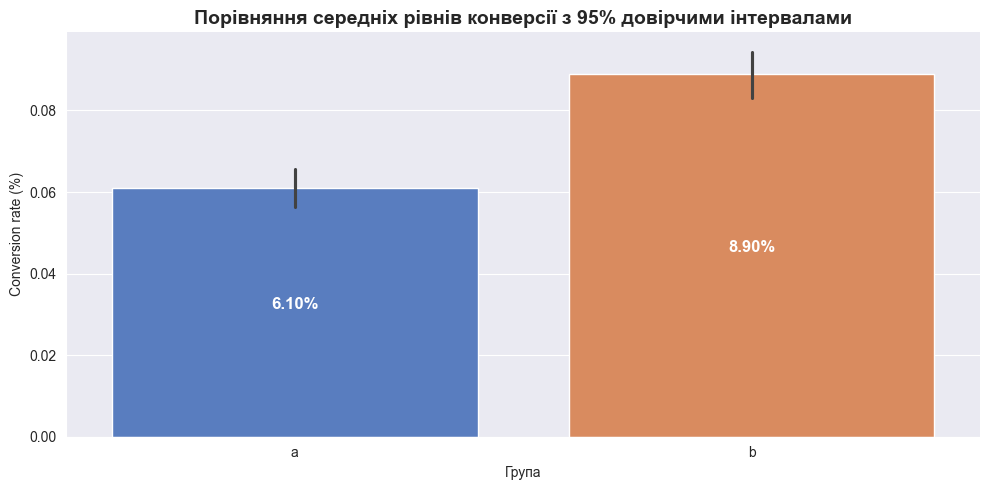

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.barplot(
    data=data,
    x='test_group',
    y='conversion',
    hue='test_group',
    palette='muted',
    legend=False,
    errorbar=('ci', 95)
)


summary_plot = (
    data.groupby('test_group')['conversion']
    .mean()
    .mul(100)
    .reset_index()
)

for i, row in summary_plot.iterrows():
    ax.text(
        i,
        row['conversion'] / 200,
        f"{row['conversion']:.2f}%",
        ha='center',
        va='bottom',
        color='white',
        fontsize=12,
        weight='bold'
    )

plt.title("Порівняння середніх рівнів конверсії з 95% довірчими інтервалами", fontsize=14, weight='bold')
plt.xlabel("Група")
plt.ylabel("Conversion rate (%)")
sns.despine()
plt.tight_layout()
plt.show()

# 8. Порівняння середніх з довірчими інтервалами Вілсона
# Порівняння середніх рівнів конверсії між групами A та B з довірчими інтервалами Вілсона.

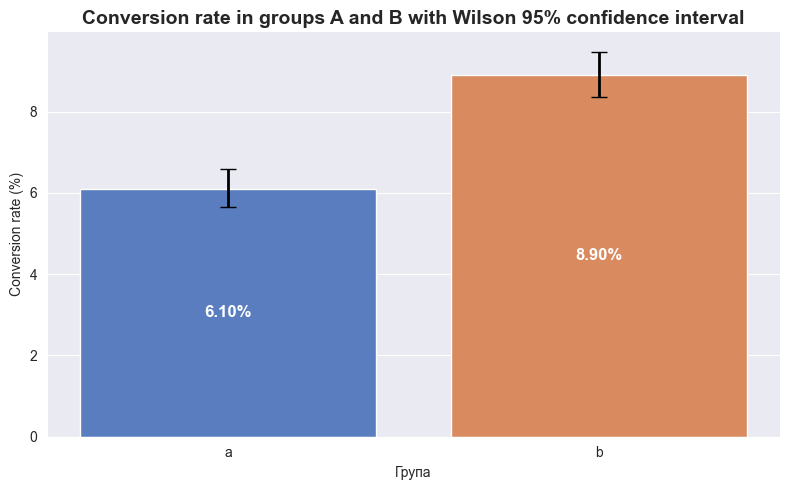

In [ ]:
def wilson_ci(k, n, conf=0.95):
    if n == 0:
        return (0, 0)
    z = norm.ppf(1 - (1-conf)/2)
    phat = k / n
    denom = 1 + z**2/n
    center = (phat + z**2/(2*n)) / denom
    half = z * math.sqrt((phat*(1-phat) + z**2/(4*n)) / n) / denom
    return (center - half, center + half)

# Підготовка даних по групах
summary = (
    data.groupby('test_group')['conversion']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'conversions', 'count': 'users'})
)

# Обчислюємо середні, довірчі інтервали та помилки
summary['mean'] = summary['conversions'] / summary['users']
summary[['ci_lo', 'ci_hi']] = summary.apply(
    lambda r: wilson_ci(r['conversions'], r['users'], 0.95), axis=1, result_type='expand'
)
summary['mean_pct'] = summary['mean'] * 100
summary['err_lo'] = (summary['mean'] - summary['ci_lo']) * 100
summary['err_hi'] = (summary['ci_hi'] - summary['mean']) * 100

# Побудова графіка
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=summary,
    x='test_group',
    y='mean_pct',
    hue='test_group',
    palette='muted',
    legend=False
)

# Додаємо "вусики" (error bars) з Wilson 95% CI
ax.errorbar(
    x=range(len(summary)),
    y=summary['mean_pct'],
    yerr=[summary['err_lo'], summary['err_hi']],
    fmt='none',
    ecolor='black',
    capsize=6,
    linewidth=2,
    zorder=10
)

# Додаємо підписи
for i, row in summary.iterrows():
    ax.text(
        i,
        row['mean_pct']/2,
        f"{row['mean_pct']:.2f}%",
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        weight='bold'
    )

plt.title("Conversion rate in groups A and B with Wilson 95% confidence interval", fontsize=14, weight='bold')
plt.xlabel("Група")
plt.ylabel("Conversion rate (%)")
sns.despine()
plt.tight_layout()
plt.show()

# 9. Різниця конверсій B − A з 95% довірчим інтервалом (Newcombe/Wilson)
# Обчислення різниці конверсій між групами A та B з 95% довірчим інтервалом за методом Newcombe/Wilson.

Δ = (B − A) = 2.80 п.п.
95% CI (Newcombe/Wilson): [1.77; 3.83] п.п.
z = 7.520, p-value = 0.0000


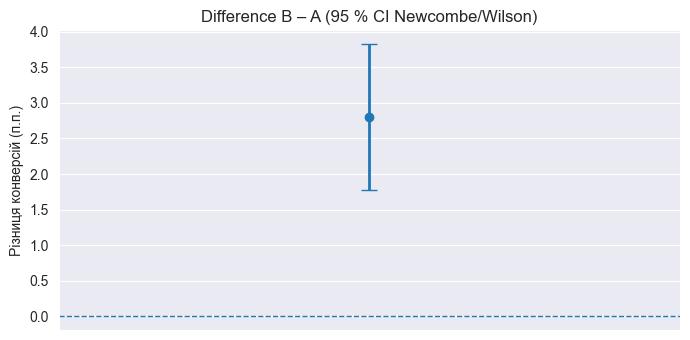

In [ ]:
def wilson_ci(k, n, conf=0.95):
    if n == 0:
        return (0.0, 0.0)
    z = norm.ppf(1 - (1-conf)/2)
    ph = k/n
    denom = 1 + z**2/n
    center = (ph + z**2/(2*n)) / denom
    half = z * math.sqrt((ph*(1-ph) + z**2/(4*n)) / n) / denom
    return (center - half, center + half)

def newcombe_diff_ci(x1, n1, x2, n2, conf=0.95):
    lo1, hi1 = wilson_ci(x1, n1, conf)
    lo2, hi2 = wilson_ci(x2, n2, conf)
    diff_lo = lo2 - hi1
    diff_hi = hi2 - lo1
    return diff_lo, diff_hi

summary = (
    data.groupby('test_group')['conversion']
    .agg(['sum', 'count'])
    .reset_index()
    .rename(columns={'sum': 'conversions', 'count': 'users'})
)
A = summary.loc[summary['test_group']=='a'].iloc[0]
B = summary.loc[summary['test_group']=='b'].iloc[0]

nA, xA = int(A['users']), int(A['conversions'])
nB, xB = int(B['users']), int(B['conversions'])

pA, pB = xA/nA, xB/nB
diff = pB - pA

ci_lo, ci_hi = newcombe_diff_ci(xA, nA, xB, nB, conf=0.95)

p_pool = (xA + xB) / (nA + nB)
se = math.sqrt(p_pool*(1-p_pool)*(1/nA + 1/nB))
z = 0 if se == 0 else (pB - pA)/se
p_value = 2*(1 - norm.cdf(abs(z))) if se > 0 else 1.0

print(f"Δ = (B − A) = {diff*100:.2f} п.п.")
print(f"95% CI (Newcombe/Wilson): [{ci_lo*100:.2f}; {ci_hi*100:.2f}] п.п.")
print(f"z = {z:.3f}, p-value = {p_value:.4f}")

plt.figure(figsize=(7,3.5))
x0 = 0
plt.errorbar(
    x=x0, y=diff*100,
    yerr=[[ (diff - ci_lo)*100 ], [ (ci_hi - diff)*100 ]],
    fmt='o', capsize=6, linewidth=2
)
plt.axhline(0, linestyle='--', linewidth=1)
plt.xlim(-1, 1)
plt.xticks([])
plt.ylabel("Різниця конверсій (п.п.)")
plt.title("Difference B – A (95 % CI Newcombe/Wilson)")
plt.tight_layout()
plt.show()

# Графік динаміки рівня конверсії по днях для груп A та B

# 10. Графіки та візуалізації
# Різноманітні графіки та візуалізації для кращого розуміння результатів A/B-тесту.

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
data = data.dropna(subset=['timestamp'])
data['date'] = data['timestamp'].dt.date

per_user_day = (
    data.groupby(['date', 'test_group', 'user_id'], as_index=False)['conversion']
    .max()
)

daily_cr = (
    per_user_day.groupby(['date', 'test_group'], as_index=False)
    .agg(users=('user_id', 'nunique'), conversions=('conversion', 'sum'))
    .assign(conversion_rate=lambda x: x['conversions'] / x['users'] * 100)
)


# Кумулятивна конверсія з плином часу

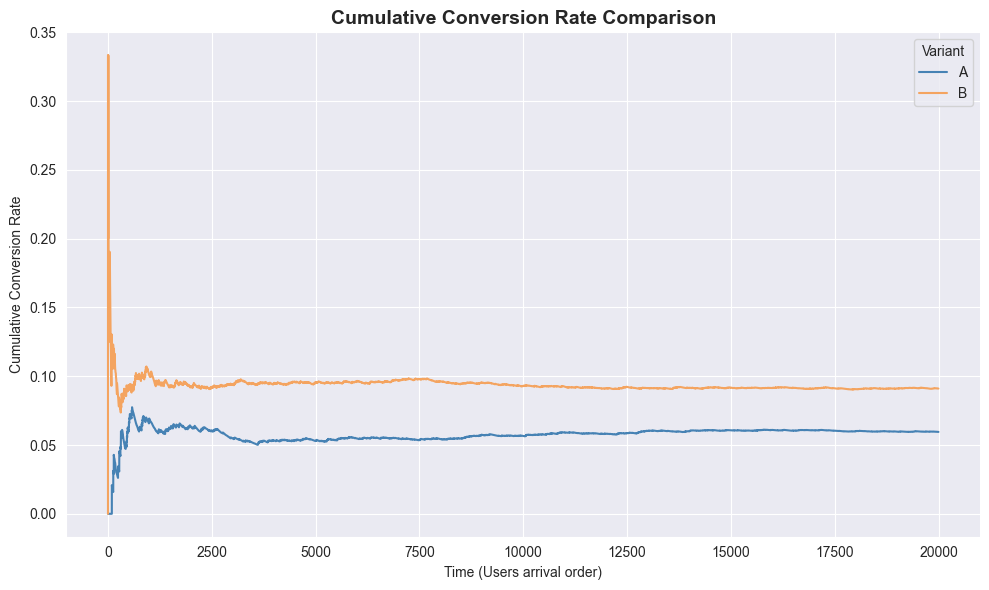

In [ ]:
np.random.seed(42)

# Користувачі у групах
users_A, users_B = 10013, 9985

# Конверсії у вигляді 0/1 (приблизно 6.1% та 8.9%)
data = pd.DataFrame({
    'test_group': ['A'] * users_A + ['B'] * users_B,
    'conversion': np.concatenate([
        np.random.binomial(1, 0.061, users_A),
        np.random.binomial(1, 0.089, users_B)
    ])
})

# Перемішуємо, щоб імітувати часову послідовність
data = data.sample(frac=1).reset_index(drop=True)

# Кумулятивна конверсія з плином часу
data['cumulative_conversion'] = (
    data.groupby('test_group')['conversion']
        .expanding()
        .mean()
        .reset_index(level=0, drop=True)
)

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[data['test_group'] == 'A'],
             x=data[data['test_group'] == 'A'].index,
             y='cumulative_conversion',
             label='A', color='steelblue')
sns.lineplot(data=data[data['test_group'] == 'B'],
             x=data[data['test_group'] == 'B'].index,
             y='cumulative_conversion',
             label='B', color='sandybrown')

plt.title('Cumulative Conversion Rate Comparison', fontsize=14, weight='bold')
plt.xlabel('Time (Users arrival order)')
plt.ylabel('Cumulative Conversion Rate')
plt.legend(title='Variant')
sns.despine()
plt.tight_layout()
plt.show()

# Гістограма двох нормальних розподілів

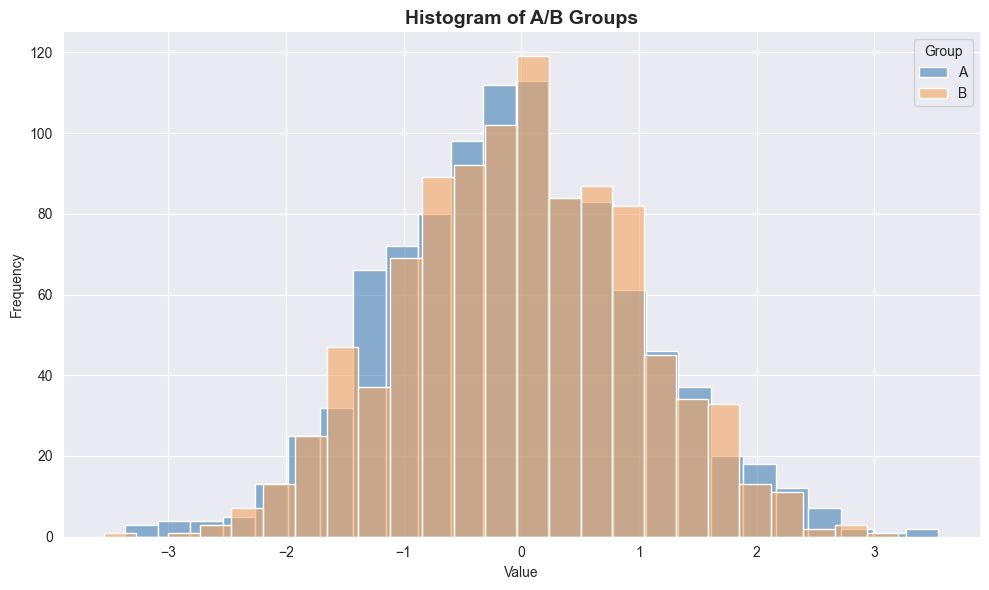

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(stats.norm.rvs(size=1000), color='steelblue', alpha=0.6, label='A')
sns.histplot(stats.norm.rvs(size=1000), color='sandybrown', alpha=0.6, label='B')

plt.title('Histogram of A/B Groups', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend(title='Group')
sns.despine()
plt.tight_layout()
plt.show()

# Графік щільності двох нормальних розподілів

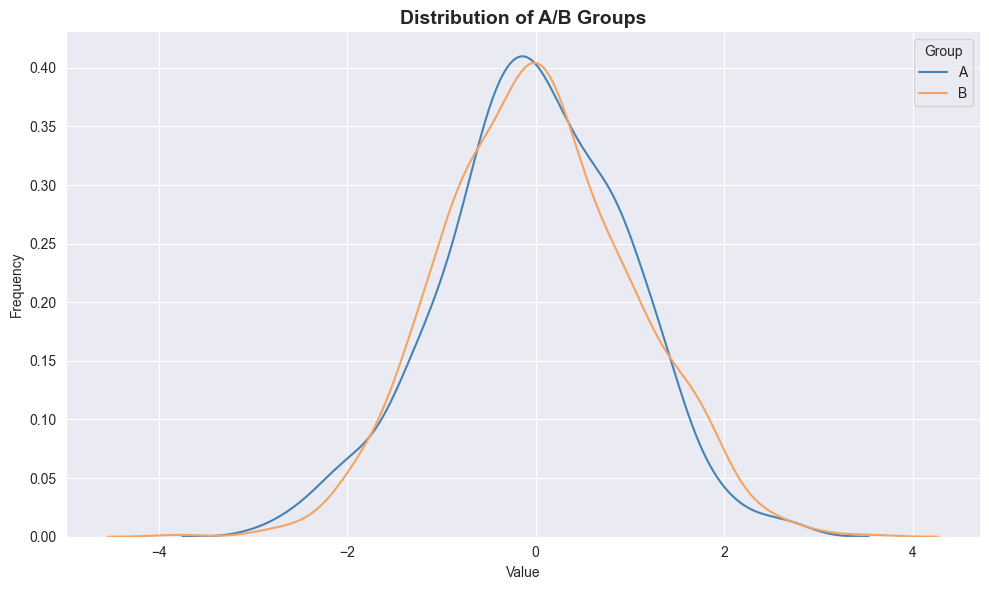

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(stats.norm.rvs(size=1000), color='steelblue', label='A')
sns.kdeplot(stats.norm.rvs(size=1000), color='sandybrown', label='B')

plt.title('Distribution of A/B Groups', fontsize=14, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend(title='Group')
sns.despine()
plt.tight_layout()
plt.show()